<a href="https://colab.research.google.com/github/Sukruthr/Hotel-Booking-Data-EDA/blob/main/EDA_HBD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [97]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
# import the csv file as a DataFrame
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Team Capstone Projects/EDA - Hotel Bookings/Hotel Bookings.csv')

# Introduction Regarding the given Dataset

This data article describes two datasets with hotel demand data. One of the hotels (H1) is a resort hotel and the other is a city hotel (H2). Both datasets share the same structure, with 31 variables describing the 40,060 observations of H1 and 79,330 observations of H2. Each observation represents a hotel booking. Both datasets comprehend bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled. Since this is hotel real data, all data elements pertaining hotel or costumer identification were deleted.

*Both Datasets H1 and H2 are combined to form this Dataset*

* **Data source location** --	Both hotels are located in Portugal: H1 at the resort region of Algarve and H2 at the city of Lisbon.

* Distance between Algarve(Faro) from Lisbon is 173 miles ( 280 km)

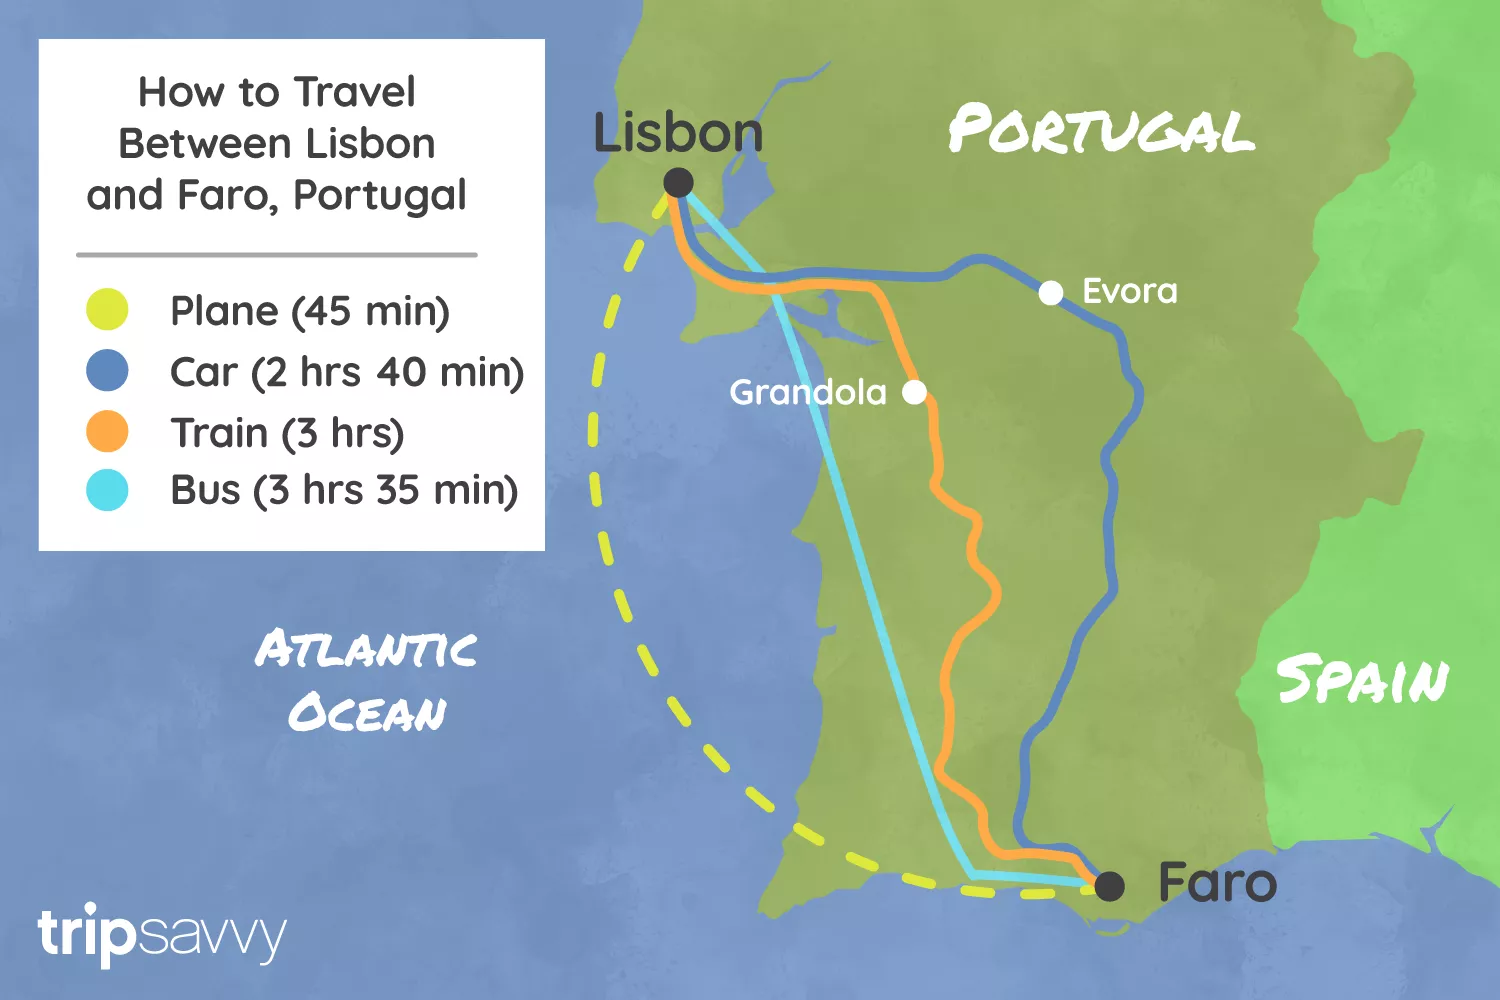

## Column Names and their meanings

* **hotel**: hotel type(H1 = Resort Hotel or H2 = City Hotel)
* **is_canceled**: Value indicating if the booking was canceled (1) or not (0)
* **lead_time**: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
* **arrival_date_year**: Year of arrival date
* **arrival_date_month**: Month of arrival date
* **arrival_date_week_number**: Week number of year for arrival date
* **arrival_date_day_of_month**: Day of arrival date
* **stays_in_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* **stays_in_week_nights**: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* **adults**: Number of adults
* **children**: Number of children
* **babies**: Number of babies
* **meal**: Type of meal booked. Categories are presented in standard hospitality  meal packages:  

  1.   Undefined/SC – no meal package
  2.   BB – Bed & Breakfast
  3.   HB – Half board (breakfast and one other meal – usually dinner)
  4.   FB – Full board (breakfast, lunch and dinner)

* **country**: Country of origin. Categories are represented in the ISO 3155–3:2013 format.
* **market_segment**: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”.
* **distribution_channel**: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”.
* **is_repeated_guest**: Value indicating if the booking name was from a repeated guest (1) or not (0)
* **previous_cancellations**: Number of previous bookings that were cancelled by the customer prior to the current booking
* **previous_bookings_not_canceled**: Number of previous bookings not cancelled by the customer prior to the current booking.
reserved_room_type: Code of room type reserved. Code is presented instead of designation for anonymity reasons.
* **assigned_room_type**: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
* **booking_changes**: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.
* **deposit_type**: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: 
  1. No Deposit – no deposit was made 
  2. Non Refund – a deposit was made in the value of the total stay cost  
  3. Refundable – a deposit was made with a value under the total cost of stay.
* **agent**: ID of the travel agency that made the booking
* **company**: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons.
* **days_in_waiting_list**: Number of days the booking was in the waiting list before it was confirmed to the customer.
* **customer_type**: Type of booking, assuming one of four categories: 
  1. Contract - when the booking has an allotment or other type of contract associated to it 
  2. Group – when the booking is associated to a group 
  3. Transient – when the booking is not part of a group or contract, and is not associated to other transient booking 
  4. Transient-party – when the booking is transient, but is associated to at least other transient booking.
* **adr**: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights.
(measures the average rental revenue earned for an occupied room per day. The operating performance of a hotel or other lodging business can be determined by using the ADR. Multiplying the ADR by the occupancy rate equals the revenue per available room.)
* **required_car_parking_spaces**: Number of car parking spaces required by the customer
* **total_of_special_requests**: Number of special requests made by the customer (e.g. twin bed or high floor)
* **reservation_status**: Reservation last status, assuming one of three categories: 
  1. Canceled – booking was canceled by the customer 
  2. Check-Out – customer has checked in but already departed 
  3. No-Show – customer did not check-in and did inform the hotel of the reason why.
* **reservation_status_date**: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel.

# Data Inspection 

In [100]:
# top five rows
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [101]:
# bottom five rows
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [102]:
# shape and size of the given data
print(f'the shape of the df is : {df.shape}') 
print(f'the size of the df is  : {df.size}')

the shape of the df is : (119390, 32)
the size of the df is  : 3820480


# Data Discription

In [103]:
#  info regarding all rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [104]:
# dataset summary statistics – Integer and numeric variables.
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [105]:
# find all the categrorical columns
discriptive_cols = []
for col in list(df.columns):
  if col not in list(df.describe().columns):
    discriptive_cols.append(col)

In [106]:
# dataset summary statistics – Categorical variables.
df[discriptive_cols].describe().transpose()

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


# Data Cleaning

In [107]:
# number of null values in each column 
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

so from the above table we can see that children, country, agent and comapny have null values  

In [108]:
# replacing these missing values

# children - with 0 signifying no child
# company - if none is given, most likely it was a private
# country - if none are given then it will be set to its mode
nan_replacements = {'children': 0.0,"country": df['country'].mode().values[0], "agent": 0}
df.fillna(value=nan_replacements,inplace=True)

In [109]:
# cross check if there are any remaining NaN values in df
for nan_count in df.isna().sum().values:
  if nan_count > 0:
    print('NaN values are present')
    
# prints nothing if there are no NaN values in the DF

NaN values are present


In [110]:
# checking the unique values of meals we find that 
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

From col definition we have -  *Undefined/SC – no meal package*

In [111]:
# changing the undefined type to SC
df['meal'].replace("Undefined","SC",inplace = True)

In [112]:
# removing rows that contain no customers i.e 0 = children/adults/babies as this causes infity in canculations related to adr
zero_travellers = list(df.loc[df['adults']+df['children']+df['babies'] == 0].index)
df.drop(df.index[zero_travellers],inplace=True)

In [113]:
# both market segemnt and distribution challne contain similar data, but market_segment contains more data points hence that is being considered
various_market_segments = df['market_segment'].unique()
print(f'market segment include : \n{various_market_segments}\n')

# distribution channel  
various_distribution_channels = df['distribution_channel'].unique()
print(f'distribution channel include : \n{various_distribution_channels}')

# as both contain similar info and market segment has more categories compared to distribution channel 
# distribution channel will be dropped
df.drop(columns=['distribution_channel'],inplace=True)

# dropping company column as it consits of lot of null values
# agent - if no agency is given then it was booked without one
df.drop(columns=['company'],inplace=True)

market segment include : 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

distribution channel include : 
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']


In [114]:
# shape of df after removing the 0 traveler rows and dropping a cloumn
df.shape

(119210, 30)

# EDA

In [115]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Traveller's Country of Origin

In [116]:
print(f"Travellers from over {len(df['country'].unique())} countries have come to these hotels")

Travellers from over 177 countries have come to these hotels


In [117]:
# plot the graph for travellers from various countries
country_df = pd.DataFrame(df.loc[df['is_canceled']==0]['country'].value_counts())
# country_df
country_df.rename(columns={'country':'Number of Travellers'},inplace=True)
total_travellers = country_df["Number of Travellers"].sum()
country_df["Travellers in %"] = round(country_df["Number of Travellers"] / total_travellers * 100, 2)
country_df["country"] = country_df.index
# country_df

# pie plot
fig = px.pie(country_df,
             values="Number of Travellers",
             names="country",
             title="Home country of Travellers",
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

In [118]:
#  visulizing the same on a map
travellers_map = px.choropleth(country_df,
                    locations=country_df.index,
                    color=np.log(country_df["Number of Travellers"]), 
                    hover_name=country_df.index, 
                    color_continuous_scale="Viridis",
                    title="Home country of Travellers")
travellers_map.show()


In [119]:
top_ten_countries = country_df.nlargest(10,columns=['Travellers in %'])
print(f"the top 10 countries are {list(top_ten_countries.index)} and they contribute to {round(top_ten_countries['Travellers in %'].sum(),2)}% of the total bookings")

the top 10 countries are ['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'IRL', 'ITA', 'BEL', 'NLD', 'USA'] and they contribute to 82.84% of the total bookings


*Inference* : The home country's of travellers - 
* With Portugal at the top - followed by United Kingdom and France with 7 others contribute 82.8% of the total bookings.
* Also, we can see that most of the travellers are from Europe.

### Type of Hotel prefered by Most Travellers

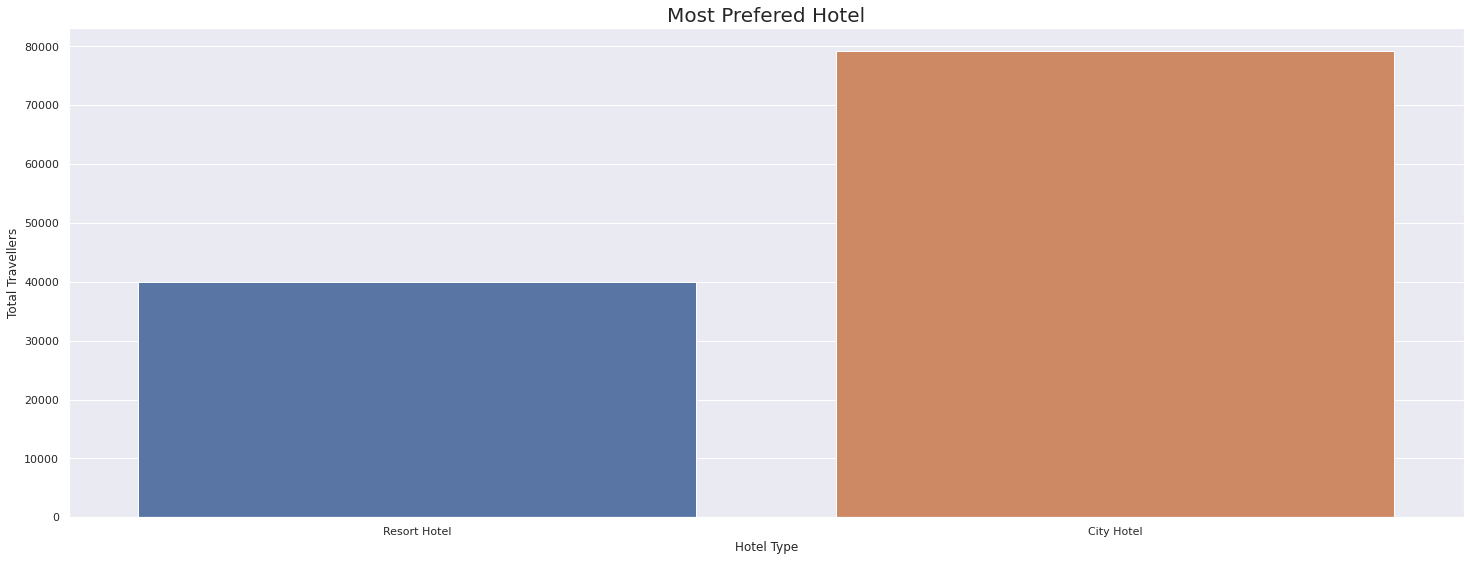

In [120]:
# most bookings done on city hotels [in hotels category]

sns.set_theme(style="darkgrid",font='sans-serif')   # set theme

plt.figure(figsize=(25, 9))                         # increase figure size
ax = sns.countplot(data = df, x = 'hotel')          # creatae count plot

ax.set_title('Most Prefered Hotel',fontsize=20)     # set title
ax.set(xlabel='Hotel Type', ylabel='Total Travellers')                    #set labels
plt.show()                                          # plot it 

*Inference* : Most travellers prefer city hotels


### Popular Stay Type - Weekend or Weekday 

In [121]:
#  total number of bookings uring weekends based on hotel type
weekend_bookings = df[(df['stays_in_weekend_nights']>0)  & (df['is_canceled']==0)].groupby('hotel')['stays_in_weekend_nights'].sum().reset_index()
# total number of bookings during  and weekdays based on hotel type
weekday_bookings = df[(df['stays_in_week_nights']>0)  & (df['is_canceled']==0)].groupby('hotel')['stays_in_week_nights'].sum().reset_index()
# merging both the wekkend and weekdays df's
total_bookings_weekends_weekdays = pd.merge(weekend_bookings,weekday_bookings,on='hotel')

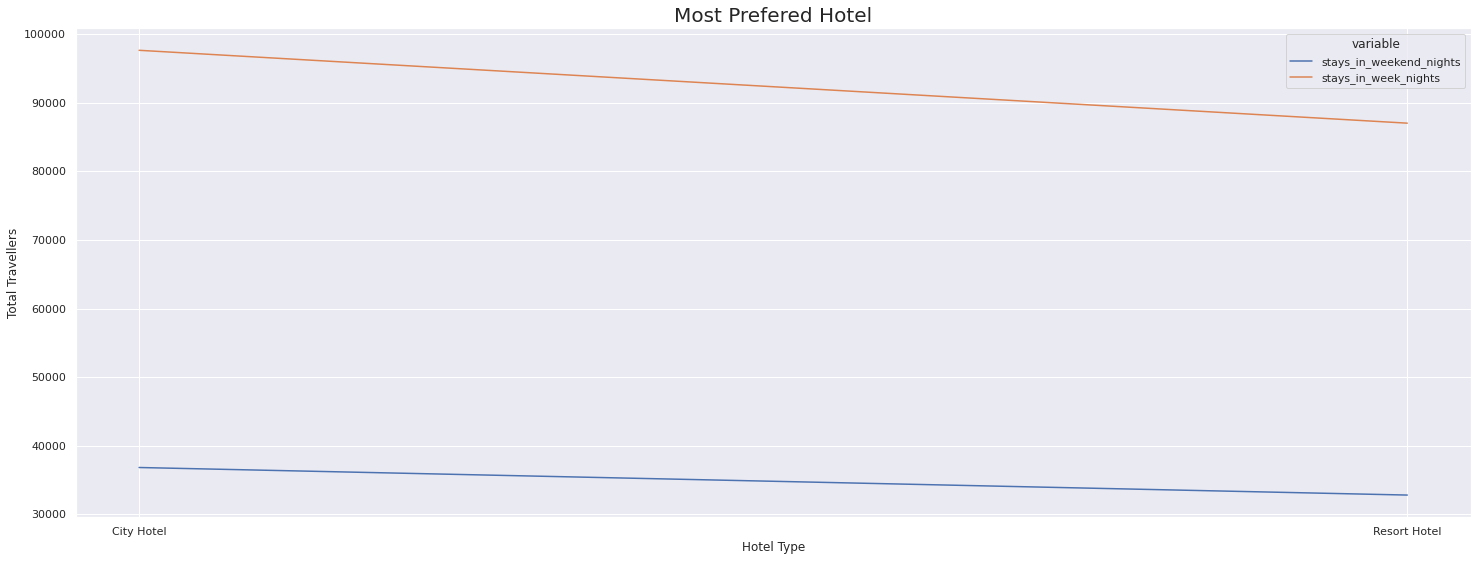

In [122]:
# plot both the bookings for weekend and weekdays
sns.set_theme(style="darkgrid",font='sans-serif')                         # set theme

plt.figure(figsize=(25, 9))                                               # increase figure size
ax = sns.lineplot(x='hotel', y='value', hue='variable', 
             data=pd.melt(total_bookings_weekends_weekdays, 'hotel'))     # create count plot

ax.set_title('Most Prefered Hotel',fontsize=20)                           # set title
ax.set(xlabel='Hotel Type', ylabel='Total Travellers')                    #set labels
plt.show()                                                                # plot it 

*Inference* : We can see that number of people staying during week nights is more than those staying during weekend nights also most people prefer to stay in the city hotels .

In [123]:
# seprating resort and hotel type data
rh_df = df[df['hotel']=='Resort Hotel'] # resort hotel 
ch_df = df[df['hotel']=='City Hotel']   # city hotel

# total nights in each type
rh_df['total_nights'] = rh_df['stays_in_weekend_nights'] + rh_df['stays_in_week_nights']
ch_df['total_nights'] = ch_df['stays_in_weekend_nights'] + ch_df['stays_in_week_nights']

# caluating percentage of city and resort bookings per night stay
num_nights_res = list(rh_df["total_nights"].value_counts().index)
num_bookings_res = list(rh_df["total_nights"].value_counts())
relative_bookings_res = rh_df["total_nights"].value_counts() / sum(num_bookings_res) * 100 # convert to percent

num_nights_cty = list(ch_df["total_nights"].value_counts().index)
num_bookings_cty = list(ch_df["total_nights"].value_counts())
relative_bookings_cty = ch_df["total_nights"].value_counts() / sum(num_bookings_cty) * 100 # convert to percent

# create Data frames for resort nights and city nights 
resort_nights = pd.DataFrame({"hotel": "Resort hotel",
                           "num_nights": num_nights_res,
                           "rel_num_bookings": relative_bookings_res})

city_nights = pd.DataFrame({"hotel": "City hotel",
                           "num_nights": num_nights_cty,
                           "rel_num_bookings": relative_bookings_cty})

nights_data = pd.concat([resort_nights, city_nights], ignore_index=True)

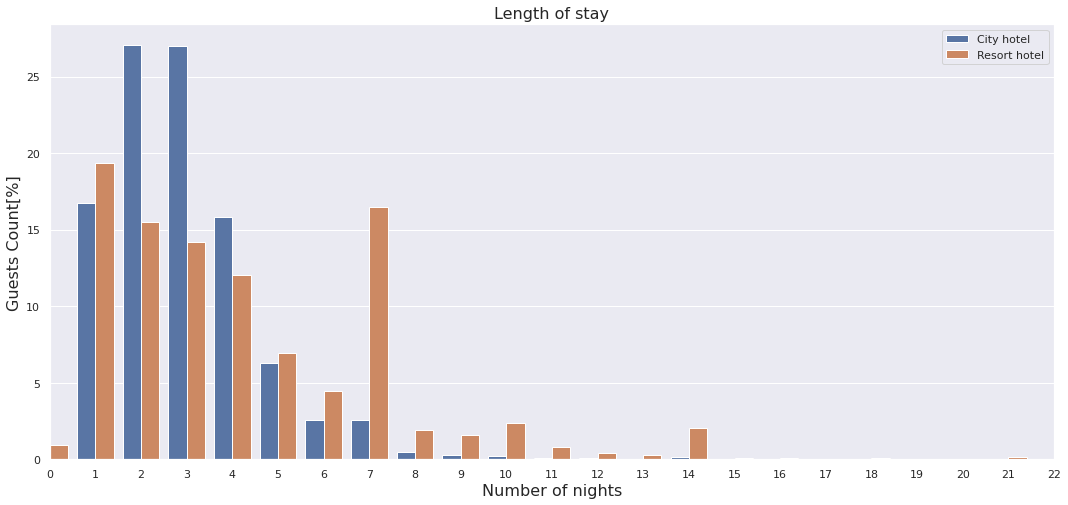

In [124]:
# plotting the above data
plt.figure(figsize=(18, 8))
sns.barplot(x = "num_nights", y = "rel_num_bookings", hue="hotel", data=nights_data,
            hue_order = ["City hotel", "Resort hotel"])
plt.title("Length of stay", fontsize=16)
plt.xlabel("Number of nights", fontsize=16)
plt.ylabel("Guests Count[%]", fontsize=16)
plt.legend(loc="upper right")
plt.xlim(0,22)
plt.show()

In [125]:
# calculating the average money for resort hotel and city hotel
avg_nights_resort = sum(list((resort_nights["num_nights"] * (resort_nights["rel_num_bookings"]/100)).values))
avg_nights_city = sum(list((city_nights["num_nights"] * (city_nights["rel_num_bookings"]/100)).values))
print(f"On average, guests of the City hotel stay {avg_nights_city:.2f} nights, and {city_nights['num_nights'].max()} at maximum.")
print(f"On average, guests of the Resort hotel stay {avg_nights_resort:.2f} nights, and {resort_nights['num_nights'].max()} at maximum.")

On average, guests of the City hotel stay 2.97 nights, and 48 at maximum.
On average, guests of the Resort hotel stay 4.32 nights, and 69 at maximum.


*Inference* : 
* For resort hotels 1-4 days is being prefered but 7 days also seems to be among favorite pick .
* For city hotels also 1-4 days is being prefered

### Hotel Type with most repeated Travellers

In [126]:
# plot the graph for travellers from various countries
repeated_guests = pd.DataFrame(df.loc[df['is_canceled']==1]['hotel'].value_counts())

repeated_guests.rename(columns={'hotel':'Number of Travellers'},inplace=True)
total_travellers = repeated_guests["Number of Travellers"].sum()
repeated_guests["Travellers in %"] = round(repeated_guests["Number of Travellers"] / total_travellers * 100, 2)
repeated_guests
# pie plot
fig = px.pie(repeated_guests,
             values="Number of Travellers",
             names=repeated_guests.index,
             title="Number of repeated travellers",
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

*Inference* : City Hotel has the highest number of repeated traveler’s 33,000 (74 %) and resort hotel has about 11,120 (25 %)

## Features and their effect on bookings & cancellations 

### Total Bookings v/s Cancellantions 

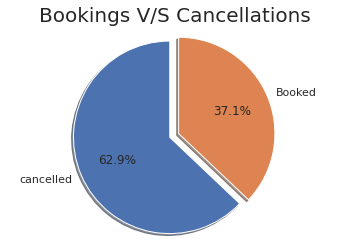

In [127]:
# overall cancellations and bookings

sns.set_theme(style="darkgrid",font='sans-serif')              # set theme
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['cancelled', 'Booked']
explode = (0, 0.1)                                            # only "explode" the 2nd slice (i.e. 'not cancelled')

# plt.figure(figsize=(25, 9))                                   # increase figure size
fig1, ax = plt.subplots()
ax.pie(df['is_canceled'].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# set title
ax.set_title("Bookings V/S Cancellations",fontsize=20)
plt.show()                                                   # plot it                      

*Inference* : Only 37.1% of the data accounts for bookings and the rest towards cancellations


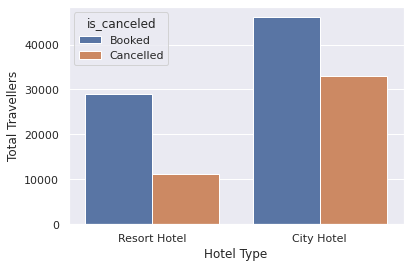

In [128]:
# cancellation and booking for each hotel type
labels = ['cancelled', 'not cancelled']
ax= sns.countplot(x='hotel', hue='is_canceled',data=df)
ax.set(xlabel='Hotel Type', ylabel='Total Travellers')                    #set labels
# set legends
leg = ax.get_legend().texts
leg[0].set_text("Booked")
leg[1].set_text("Cancelled")

*Inference* :  Only 37% bookings has been obserevd and City Hotel has higher bookings compared to Resort Hotel.
City Hotel had more cancellations than restort hotel 


### Year with the most bookings 

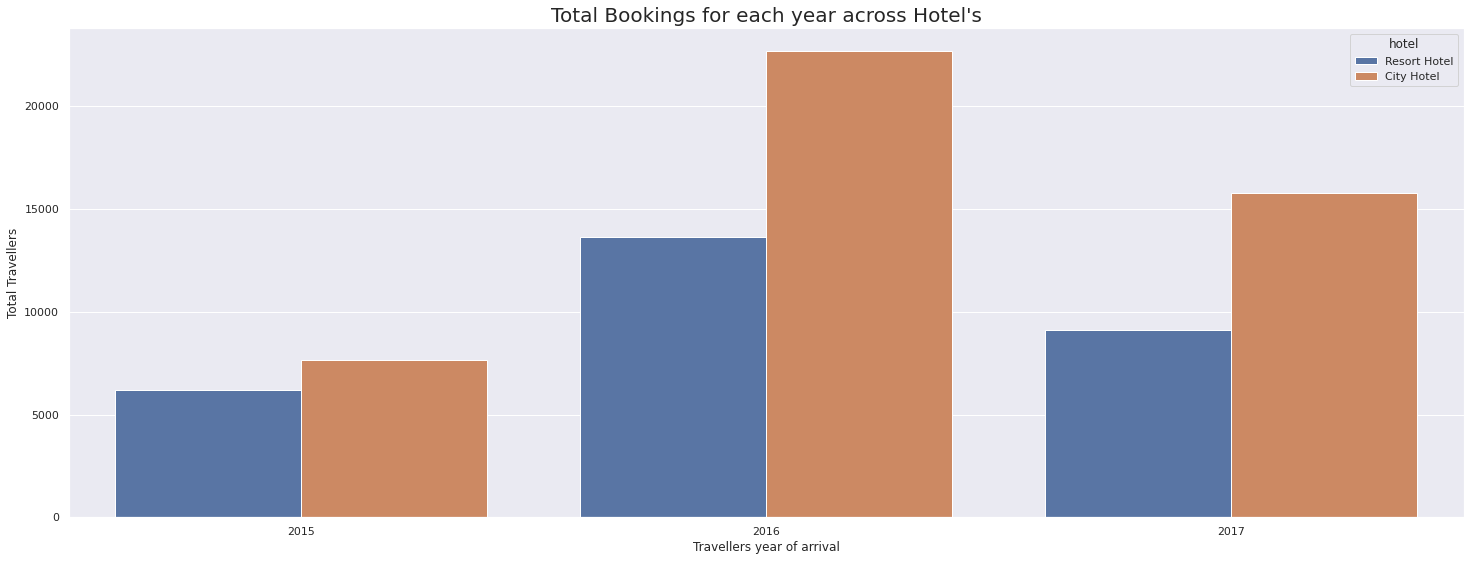

In [129]:
# overview of bokings done during the years

sns.set_theme(style="darkgrid",font='sans-serif')                           # set theme

plt.figure(figsize=(25, 9))                                                 # increase figure size
                                                                            # create count plot of bookings
ax =sns.countplot(data = df[df['is_canceled']==0], x = 'arrival_date_year', hue='hotel')          

ax.set_title("Total Bookings for each year across Hotel's",fontsize=20)     # set title
ax.set(xlabel='Travellers year of arrival', ylabel='Total Travellers')                    #set labels
plt.show()                                                                  # show plot

*Inference* : The Year 2016 saw the greatest number of bookings across both Hotel types


### Bookings and Cancellations for across Months

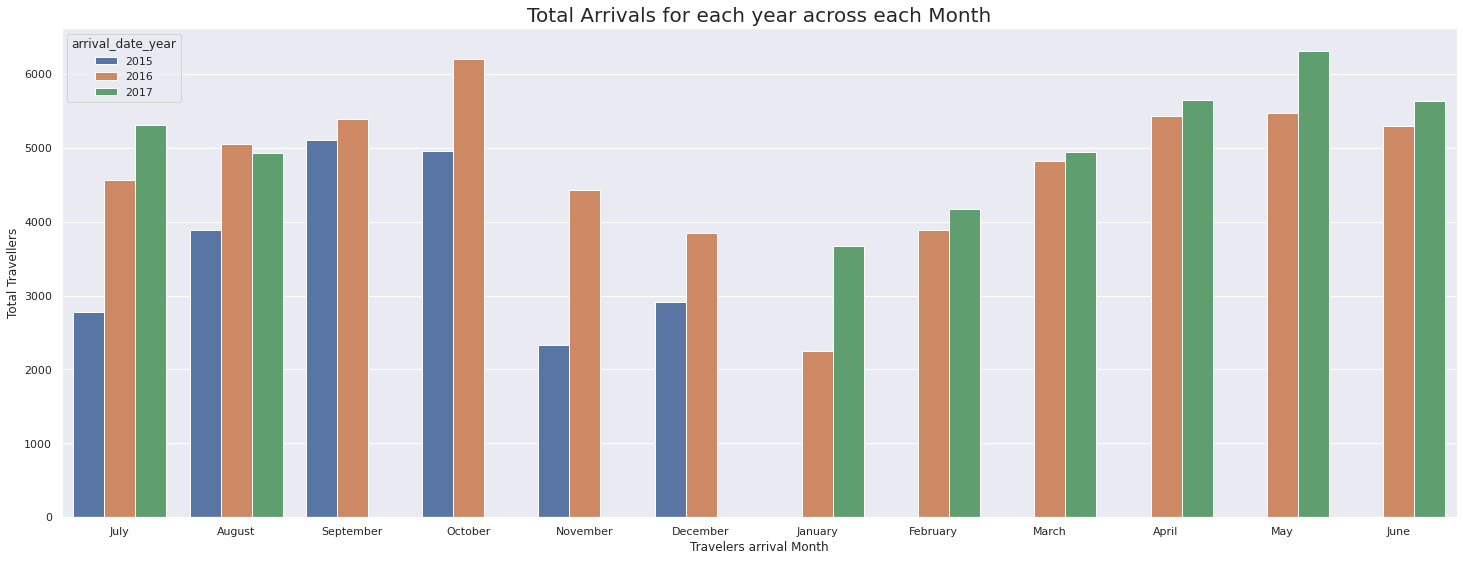

In [130]:
# plot of arrivals of travellers throught given years [indicated in different colors] 
sns.set_theme(style="darkgrid",font='sans-serif')                           # set theme

plt.figure(figsize=(25, 9))                                                 # increase figure size
                                                                            # create count plot
ax = sns.countplot(data = df, x = 'arrival_date_month', hue = 'arrival_date_year' )          

ax.set_title("Total Arrivals for each year across each Month",fontsize=20)  # set title
ax.set(xlabel='Travelers arrival Month', ylabel='Total Travellers')                    #set labels

plt.show()                                                                  # show plot

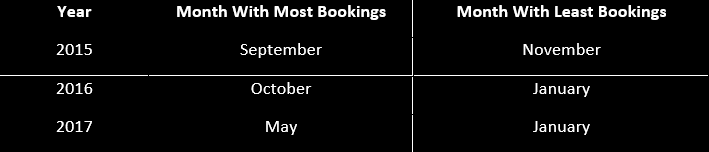


*Inference* : during the year 

1.   2015 - Highest - September : Least : November
2.   2016 - Highest - October : Least : January
3.   2016 - Highest - May : Least : January


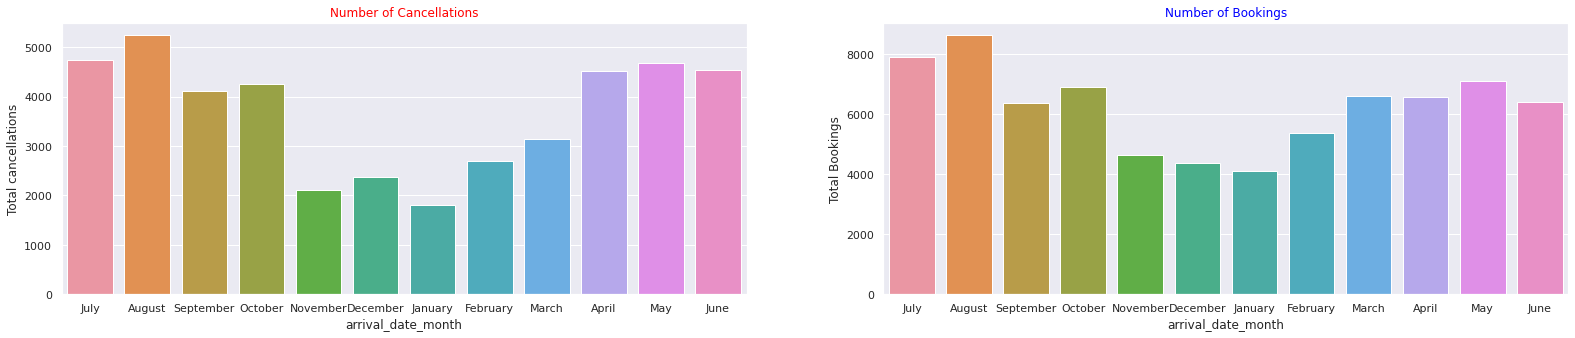

In [131]:
#  total numbers of bookings and cancellations throught the years for each month [12 months]

# set supblots and the size 
fig, ax = plt.subplots(1,2,figsize = (27,5))

b = sns.countplot(x='arrival_date_month',data =df[df['is_canceled']==0 ], ax=ax[1]) # for booking
a = sns.countplot(x='arrival_date_month',data =df[df['is_canceled']==1 ], ax=ax[0]) # for cancellation
#  set titltes and labels
a.set_title('Number of Cancellations',  color="red")
a.set(ylabel='Total cancellations')
b.set_title('Number of Bookings',  color="blue")
b.set(ylabel='Total Bookings')

fig.show() # plot 



*Inference* : But for all total booking & cancellations throught the years we can see that 


*   Months of August & July saw the most influx
*   Months of January, December & November saw the least influx



### Bookings and Cancellations for Weekdays & Weekends 

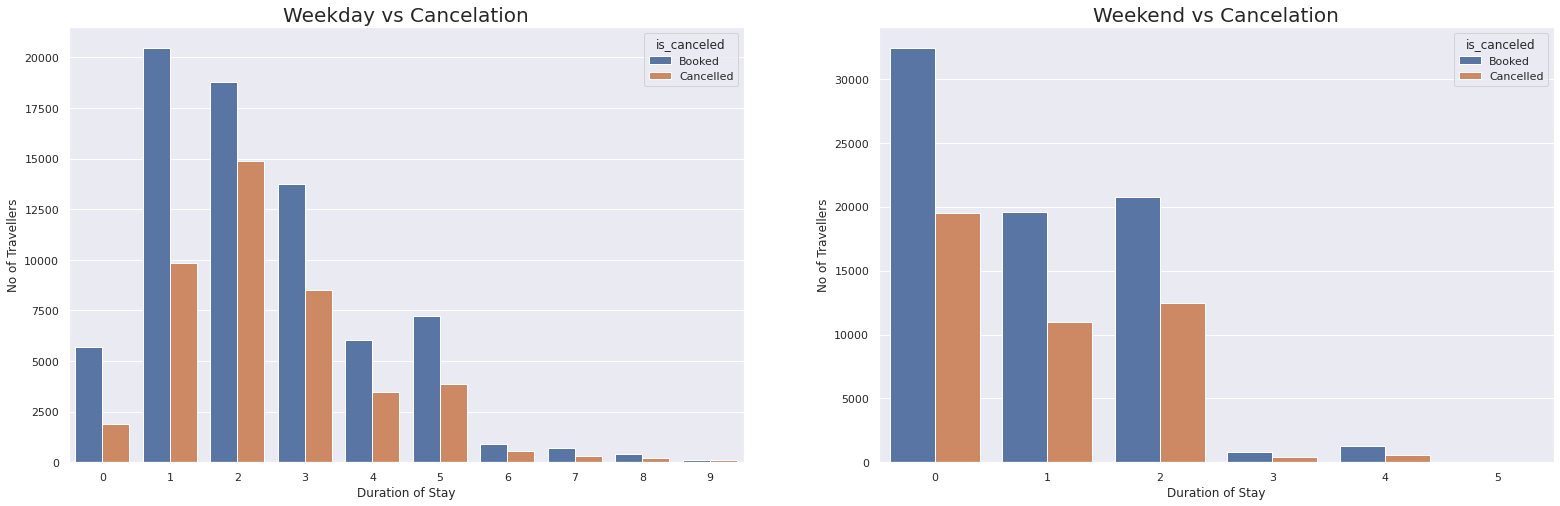

In [132]:
sns.set_theme(style="darkgrid",font='sans-serif')
plt.figure(figsize=(15, 8))

# plot comparison b/w hotel wise weekday stays and cancellation
plt.subplot(1, 2, 1)
ax=sns.countplot(data = df, x = 'stays_in_week_nights', hue='is_canceled',order = df.stays_in_week_nights.index[:10])
plt.ylabel("No of Travellers", fontsize=12)
plt.xlabel("Duration of Stay", fontsize=12)
plt.title('Weekday vs Cancelation',fontsize=20)

# set legends change 0 & 1 - bookings and cancellations
leg = ax.get_legend().texts
leg[0].set_text("Booked")
leg[1].set_text("Cancelled")

# plot comparison b/w hotel wise weekend stays and cancellation 
plt.subplot(1, 2, 2)
ax=sns.countplot(data = df, x = 'stays_in_weekend_nights', hue='is_canceled',order = df.stays_in_weekend_nights.index[:6])
plt.ylabel("No of Travellers", fontsize=12)
plt.xlabel("Duration of Stay", fontsize=12)
plt.title('Weekend vs Cancelation',fontsize=20)

# set legends
leg = ax.get_legend().texts
leg[0].set_text("Booked")
leg[1].set_text("Cancelled")

# show plot
plt.subplots_adjust(right=1.5)
plt.show()

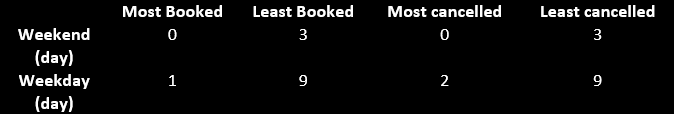

* For Weekdays one day stay has the highest bookings followed by 2, 3, 5 & 4.
* For Weekends 0 weekends stay has the highest bookings followed by 2, 1, 4 & 3.
* During Weekdays - 2 days of has the highest cancellations followed by 1 days and 3 days
* During Weekends - 0 weekends of has the highest cancellations followed by 2, 1 weekend(s) and 3 days

**0 weekends here could mean that they are leaving before the weekend is completed**

### Deposit Type

In [133]:
# plot the graph for deposit_type for cancellations
deposit_df = pd.DataFrame(df.loc[df['is_canceled']==1]['deposit_type'].value_counts())
deposit_df.rename(columns={'deposit_type':'Total'},inplace=True)
overall_sum = deposit_df["Total"].sum()
deposit_df["Total in %"] = round(deposit_df["Total"] / overall_sum * 100, 2)
deposit_df

# pie plot
fig = px.pie(deposit_df,
             values="Total",
             names=deposit_df.index,
             title="Cancellations from various Deposit Types",
             template="seaborn",
             hole=0.5)
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

*Inference* : No-deposit type has the most cancellations and refundable type has the least cancellations.

### Market Segment 

In [134]:
# market segemnt and it's unique values
print(f'market segment totally has {len(various_market_segments)} categories and they are : \n{various_market_segments}')

market segment totally has 8 categories and they are : 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']


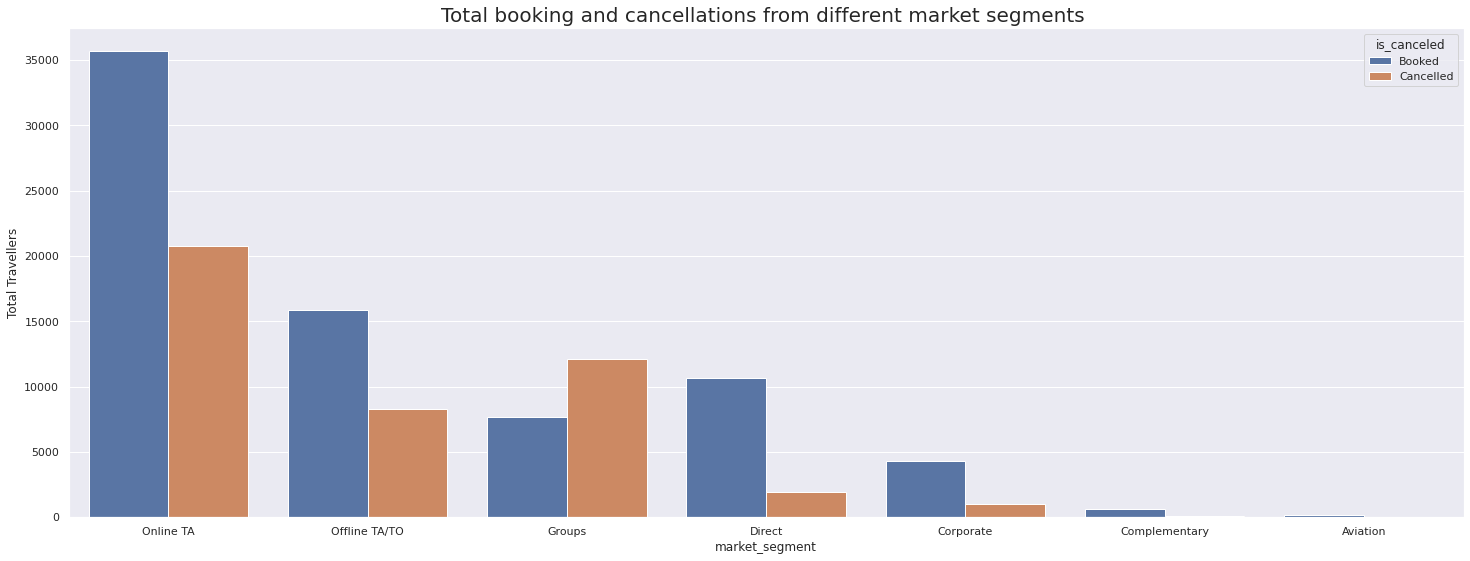

In [135]:
# both market segemnt and distribution challne contain similar data, but market_segment contains more data points hence that is being considered
# all categories of market segment are chosen except undefined
bookings_market_segment = df[(df['market_segment']!='Undefined')]

# plot this data
sns.set_theme(style="darkgrid",font='sans-serif')
plt.figure(figsize=(25, 9)) # set size 

# create a count plot and cretate an ordered plot 
ax = sns.countplot(data = bookings_market_segment,hue='is_canceled', x = 'market_segment',order=bookings_market_segment['market_segment'].value_counts().index)
# set title
ax.set_title('Total booking and cancellations from different market segments ',fontsize=20) 
ax.set(ylabel='Total Travellers')
# set legends change 0 & 1 - bookings and cancellations
leg = ax.get_legend()
labs = leg.texts
labs[0].set_text("Booked")
labs[1].set_text("Cancelled")

*Inference* : 
* Bookings - online travel agents contribute to highest(could be due to the boom of different travel apps and their relative ease of use) followed by offline ta 
then by direct bookings and group bookings.
* Cancellations - online travel agents contribute to highest followed by groups bookings then by offline ta and direct bookings.


### Agent 

In [136]:
# number of bookings and cancellations through agent
agent_bookings = df[df['agent']!=0].groupby('is_canceled')['agent'].count().reset_index()
agent_bookings["is_canceled"].replace({0: "Booked", 1: "Cancelled"}, inplace=True)
# pie plot
fig = px.pie(agent_bookings,
             values="agent",
             names="is_canceled",
             title="Bookings and Cancellations from Agents",
             template="seaborn",
             hole=0.5)
fig.update_traces(textposition="inside", textinfo="value+label")
fig.show()


*Inference* : Agent’s booking account to 62,746(61%) of the total bookings. 

### Customer Type 

In [137]:
# unique values in customer_type
df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

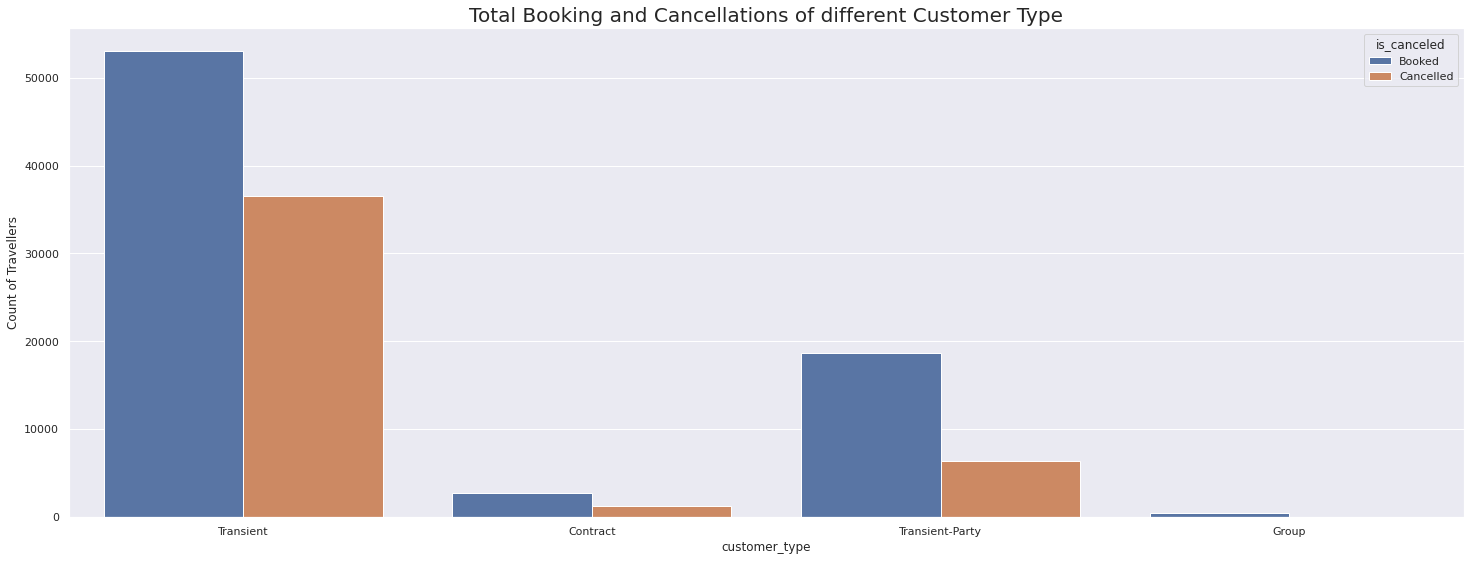

In [138]:
# booking and cancellations done by customer type
customer_type_booking = df
# plot this data
countplt = plt.subplots(figsize = (25,9))
# plot data based on booking and cancellations for different customer type
p_customer_type=sns.countplot(data = customer_type_booking, x = 'customer_type',hue='is_canceled')
# set title
p_customer_type.set_title('Total Booking and Cancellations of different Customer Type',fontsize=20)
p_customer_type.set(ylabel='Count of Travellers')
# set legends
leg = p_customer_type.get_legend()
labs = leg.texts
labs[0].set_text("Booked")
labs[1].set_text("Cancelled")

*Inference* : •	Transient (of customer type)[travellers who stay for a very short duration] has the most bookings as well as cancellations followed by, Transient-Party, Contract & Group

### Lead Time 

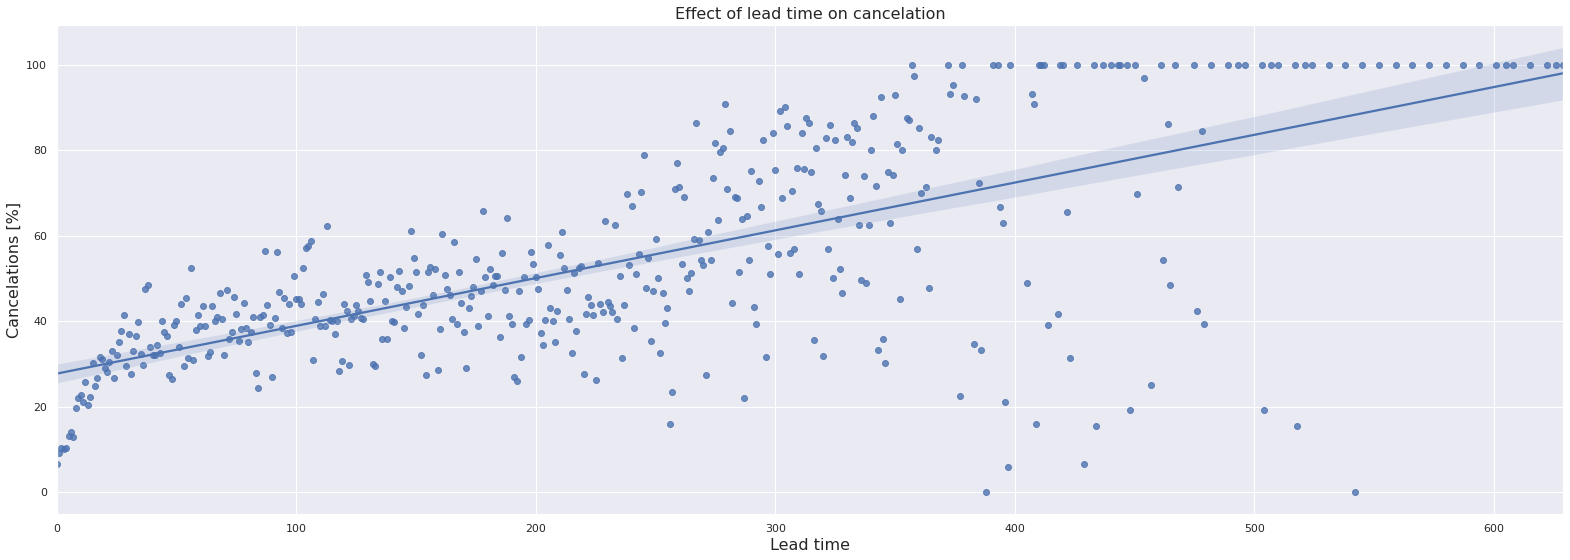

In [139]:
# the effect of lead time on cancellation . 
# Are they affecting each other ? if so how ?

# group data for lead_time:
lead_cancel_df = df.groupby("lead_time")["is_canceled"].describe()

# use only lead_times wih more than 10 bookings for graph:
lead_cancel_10 = lead_cancel_df.loc[lead_cancel_df["count"] >= 10]

#show figure:
plt.figure(figsize=(27, 9))
sns.regplot(x=lead_cancel_10.index, y=lead_cancel_10["mean"].values * 100)
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.show()

**Inference** : Lead Time - Bookings made closer to the date of check-in/arrival are rarely cancelled, whereas advance bookings for more than a year are more prone to cancellations.

### Price

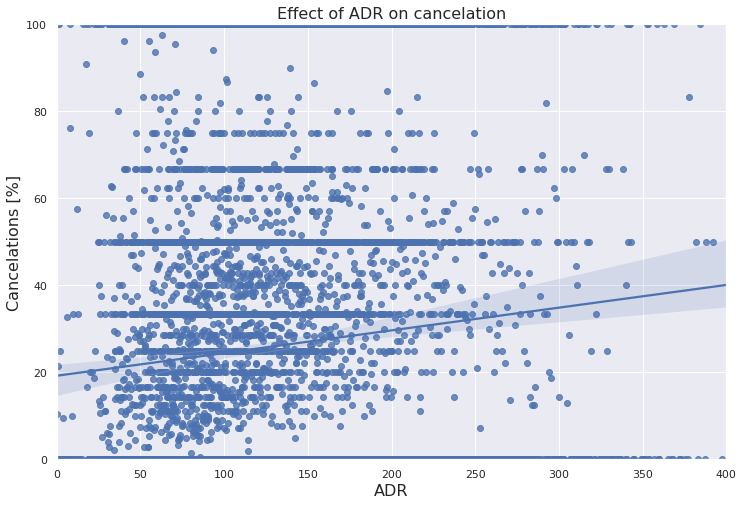

In [140]:
# group data based on adr for finding the corelation between adr and cancellations
adr_cancel_data = df.groupby("adr")["is_canceled"].describe()
# plot the  figure:
plt.figure(figsize=(12, 8))
sns.regplot(x=adr_cancel_data.index, y=adr_cancel_data["mean"].values * 100)
plt.title("Effect of ADR on cancelation", fontsize=16)
plt.xlabel("ADR", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.xlim(0,400)
plt.ylim(0,100)
plt.show()

**Inference** : No Effect !

### Special Requests 

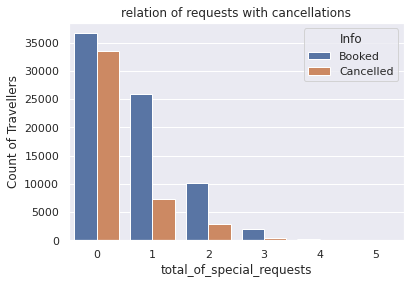

In [141]:
# the relation of these requests with cancellations
p = sns.countplot(x='total_of_special_requests',data=df,hue='is_canceled')

# set title and legends
p.set_title('relation of requests with cancellations')
p.set(ylabel='Count of Travellers')
leg = p.get_legend()
leg.set_title("Info")
labs = leg.texts
labs[0].set_text("Booked")
labs[1].set_text("Cancelled")

*Inference* : Special Request have little to no effect on bookings or cancellations as most cancellations are for 0 special requests

## Features and their Effect on Pricing

### Special Requests 

[Text(0, 0.5, 'Total Travellers')]

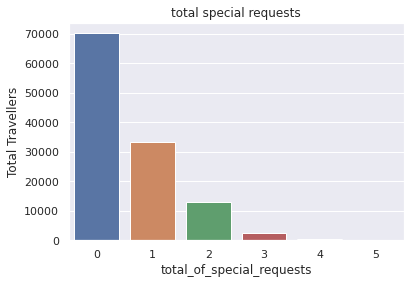

In [142]:
# number of special requests and their totals
pl = sns.countplot(x='total_of_special_requests',data=df)
# set title  
pl.set_title('total special requests')
pl.set(ylabel='Total Travellers')

Special Request for each Room Type

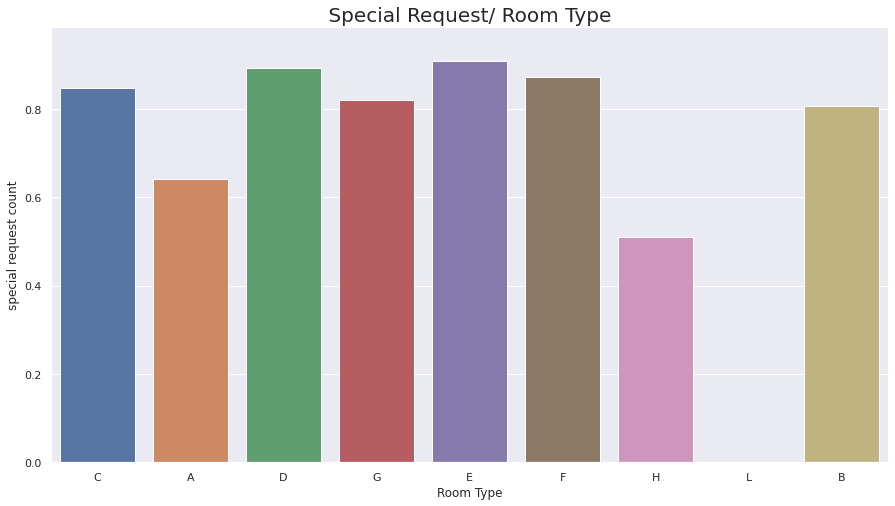

In [143]:
# plot special requests for different room types 
plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid",font='sans-serif')
ax=sns.barplot(y= "total_of_special_requests", x= "reserved_room_type", data=df[df['is_canceled']==0],errwidth=0)
plt.xlabel('Room Type',fontsize=12)
plt.ylabel('special request count',fontsize=12)
plt.title(" Special Request/ Room Type ",fontsize=20)
plt.show()

*Inference* : Room Type E has the most speacial request and room type L has the least special requests

Hotel with most requests

In [144]:
# Hotel with most requests

# plot the graph for Hotel with most requests
tot_request_df = pd.DataFrame(df.loc[(df['is_canceled']==1) & (df['total_of_special_requests']!=0)].groupby('hotel')['total_of_special_requests'].sum())
tot_request_df.rename(columns={'total_of_special_requests':'Total Special Requests'},inplace=True)

# calculating the percentage
overall_sum = tot_request_df["Total Special Requests"].sum()
tot_request_df["Total in %"] = round(tot_request_df["Total Special Requests"] / overall_sum * 100, 2)

# # pie plot
fig = px.pie(tot_request_df,
             values="Total Special Requests",
             names=tot_request_df.index,
             title="Total request recieved for various Hotel Types",
             labels=labels,
             template="seaborn",
             hole=0.5)
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

*Inference* : City hotels recieve more specail request than Resort hotels

### Room Type and Cost 

In [145]:
# let's look at the unique rooms alvaliable
room_types = df['reserved_room_type'].unique()
print(f' There are totally {len(room_types)} room types and they are {room_types}')

 There are totally 9 room types and they are ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']


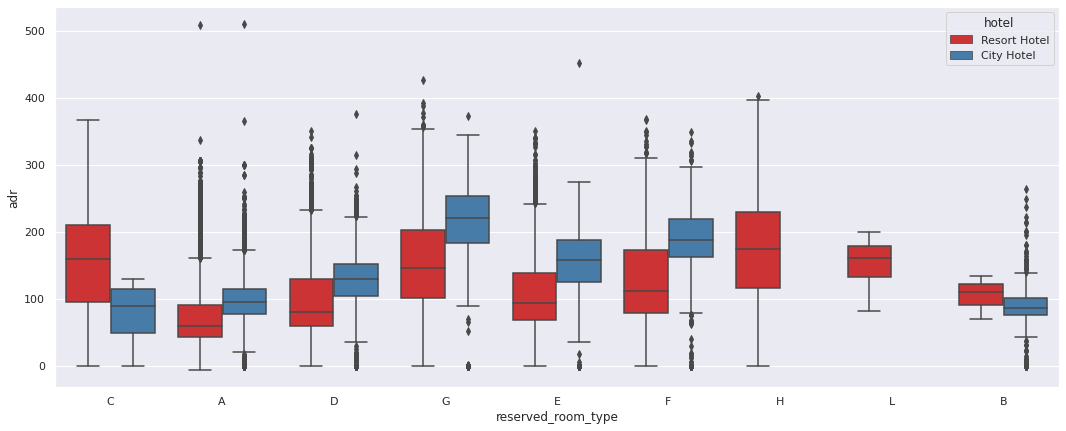

In [146]:
# price range of each room across different hotel types

# df that contains data of succesfull bookings
confirmed_booking = df[df['is_canceled']==0]
# plotting this for price range
fig = plt.figure(figsize=(18,7))
sns.boxplot(data= confirmed_booking, x = 'reserved_room_type', y = 'adr', hue = 'hotel',palette='Set1')

*Inference * : We can see that Type H rooms is the costliest in resort hotel and room type G is the costliest in City hotels  

### Meal Type

In [147]:
# different meal types
various_meal_types = df['meal'].unique()
print(f'The total meal types avialable are {len(various_meal_types)} which are {various_meal_types} ')

The total meal types avialable are 4 which are ['BB' 'FB' 'HB' 'SC'] 


In [148]:
# which meal is prefered the most
meal_count = df.groupby('meal').count()['hotel'].reset_index()
meal_count.rename(columns={"hotel":"total"},inplace=True)

# pie plot
fig = px.pie(meal_count,
             values="total",
             names="meal",
             title="Sum of Various Meal Types Preferend/Odered",
             template="seaborn",
             hole=0.5)
fig.update_traces(textposition="inside", textinfo="value+label")
fig.show()

*Inference* : •	Most preferred meal type is BB [Bed & Breakfast] (92,236) and the least preferred is FB [Full Board] (798)

### ADR

In [149]:
#  a breif stastical discription of adr
df['adr'].describe()

count    119210.000000
mean        101.969092
std          50.434007
min          -6.380000
25%          69.500000
50%          94.950000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [150]:
# how much does does it cost per person on average
cost_pp = df['adr'] / (df['adults']+df['babies']+df['children'])
print(f"On Average it costs about {round(cost_pp.mean(),2)} € per person")

On Average it costs about 54.99 € per person


In [151]:
# cost per person for each hotel type
#  using of rh_df and ch_df from (Prefered staying type - Weekend or Weekday)
resorthotelCpp = rh_df['adr'] / (rh_df['adults']+rh_df['babies']+rh_df['children']) # resort hotel cost per person
cityhotelCpp = ch_df['adr'] / (ch_df['adults']+ch_df['babies']+ch_df['children'])   # city hotel cost per person

print(f"From all bookings, across all room types and meals, the average prices are:"\
f"\nResort hotel: {round(resorthotelCpp.mean(),2)} € per night and person."\
f"\nCity hotel: {round(cityhotelCpp.mean(),2)} € per night and person.")

From all bookings, across all room types and meals, the average prices are:
Resort hotel: 48.23 € per night and person.
City hotel: 58.41 € per night and person.


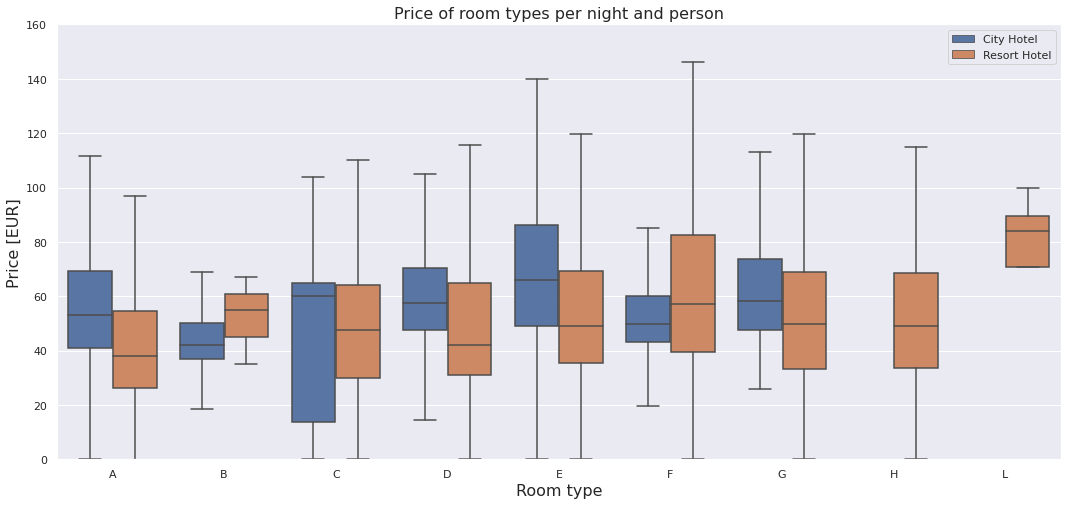

In [152]:
# calulating adr per person of people who have booked sucessfully
df["adr_pp"] = df["adr"] / (df["adults"] + df["children"]+df['babies'])
df_book = df.loc[df["is_canceled"] == 0] # only actual gusts
room_prices = df_book[["hotel", "reserved_room_type", "adr_pp"]].sort_values("reserved_room_type")

# boxplot the above findings :
plt.figure(figsize=(18, 8))
sns.boxplot(x="reserved_room_type",
            y="adr_pp",
            hue="hotel",
            data=room_prices, 
            hue_order=["City Hotel", "Resort Hotel"],
            fliersize=0)
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 160)
plt.show()

*Inference* : here we can see that how price per person varies across various rooms and different hotel types

Room price per night and person over the year across Hotels

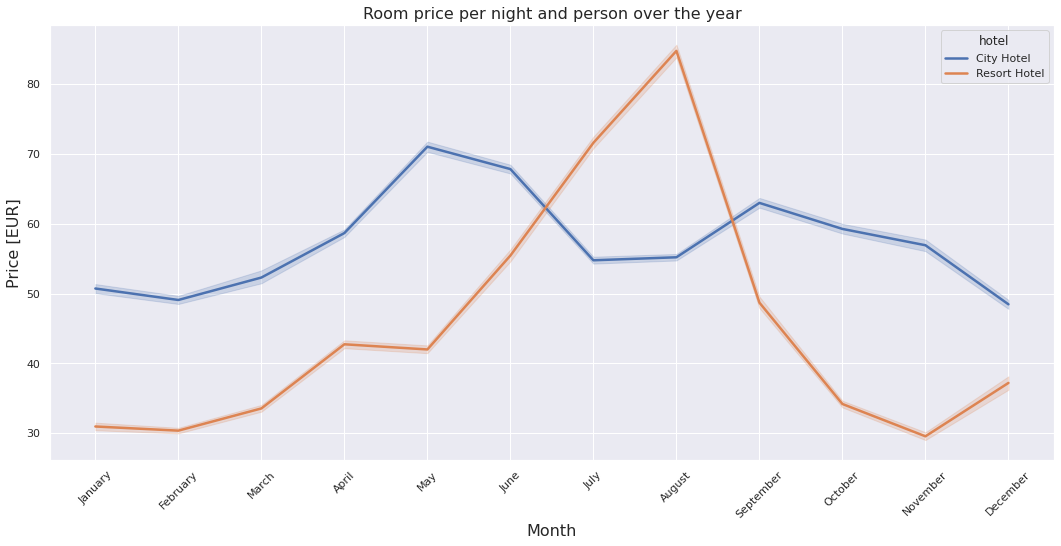

In [153]:
# sort by arrival month date on the selected columns
room_prices_mothly = df[["hotel", "arrival_date_month", "adr_pp",'is_canceled']].sort_values("arrival_date_month")

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
room_prices_mothly["arrival_date_month"] = pd.Categorical(room_prices_mothly["arrival_date_month"], categories=ordered_months, ordered=True)

# barplot with standard deviation:
plt.figure(figsize=(18, 8))
sns.lineplot(x = "arrival_date_month", y="adr_pp", hue="hotel", data=room_prices_mothly, 
            hue_order = ["City Hotel", "Resort Hotel"],  size="hotel", sizes=(2.5, 2.5))
plt.title("Room price per night and person over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Price [EUR]", fontsize=16)
plt.show()

*Inference* : From https://seasonsyear.com/Portugal 
cancellations and bookings are also changing accordingly
* We can see that price per night for Resort Hotels Peak during Summer seasons(June, July, August)
* Whereas the price per night for City hotels peaks during the Spring (May) and Autumn (Septempber) seasons
* Finally it can see clearly that during the Winter Season (January) both resort as well as the city hotels cost less .

ADR for market segment on different room type

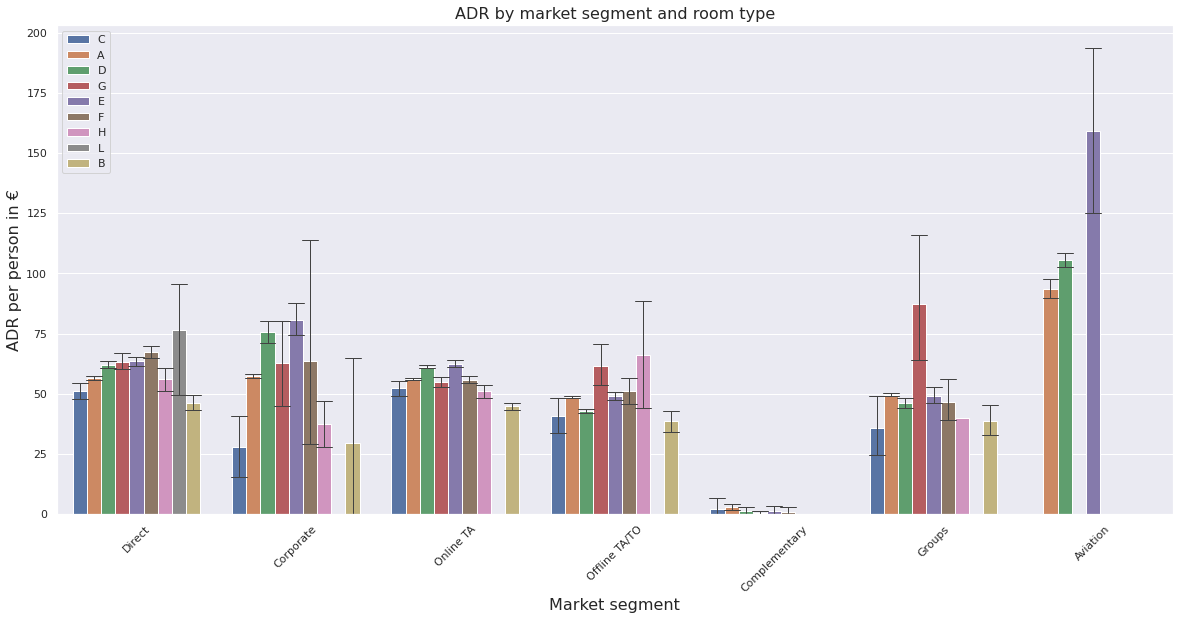

In [154]:
# price per night (ADR) and person based on booking and room. 
# show figure: #include SD
plt.figure(figsize=(20, 9))
sns.barplot(x="market_segment",
            y="adr_pp",
            hue="reserved_room_type",
            data=df_book,
            errwidth=1,
            capsize=0.1)
plt.title("ADR by market segment and room type", fontsize=16)
plt.xlabel("Market segment", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("ADR per person in €", fontsize=16)
plt.legend(loc="upper left")
plt.show()

*Inference* : For complemntary the cost is very less but on the contrary aviation pay 10 times more as much 

In [155]:
# the reason of such difference for aviation and rest others 

# data for aviation
Aviation_data = df.loc[df["market_segment"]== "Aviation"][["is_canceled","adults", "lead_time","adr_pp",]].describe()
# data for non aviation
Non_Aviation_data = df.loc[df["market_segment"]!= "Aviation"][["is_canceled","adults","lead_time","adr_pp",]].describe()

In [156]:
# stat summary of aviation data
Aviation_data

,is_canceled,adults,lead_time,adr_pp
count,235.000000,235.000000,235.00000,235.000000
mean,0.221277,1.012766,4.47234,100.270979
std,0.415992,0.112503,4.61629,20.376689
min,0.000000,1.000000,0.00000,0.000000
25%,0.000000,1.000000,1.00000,95.000000
50%,0.000000,1.000000,3.00000,95.000000
75%,0.000000,1.000000,6.00000,110.000000
max,1.000000,2.000000,23.00000,193.500000


In [157]:
# stat summary of non aviation data
Non_Aviation_data

,is_canceled,adults,lead_time,adr_pp
count,118975.000000,118975.000000,118975.000000,118975.000000
mean,0.371061,1.860878,104.306031,54.899511
std,0.483091,0.574499,106.888885,29.003596
min,0.000000,0.000000,0.000000,-3.190000
25%,0.000000,2.000000,18.000000,37.400000
50%,0.000000,2.000000,69.000000,49.500000
75%,1.000000,2.000000,161.000000,65.700000
max,1.000000,55.000000,737.000000,2700.000000


* Here by seeing the mean of their mean for lead time of bookings we can say that aviation  [4] days vs non Aviation [104] days.
* Aviation could encompass both private jets as well as commercial planes - that includes the staff and cabin crew members.
* Airline crew get one room per person to stay hence the difference of adr_per_person - 
  * Aviation [100 add_pp] and for Non Aviation [55 adr_pp] aproximately 2 times lesser

ADR based on Meal Type across hotels

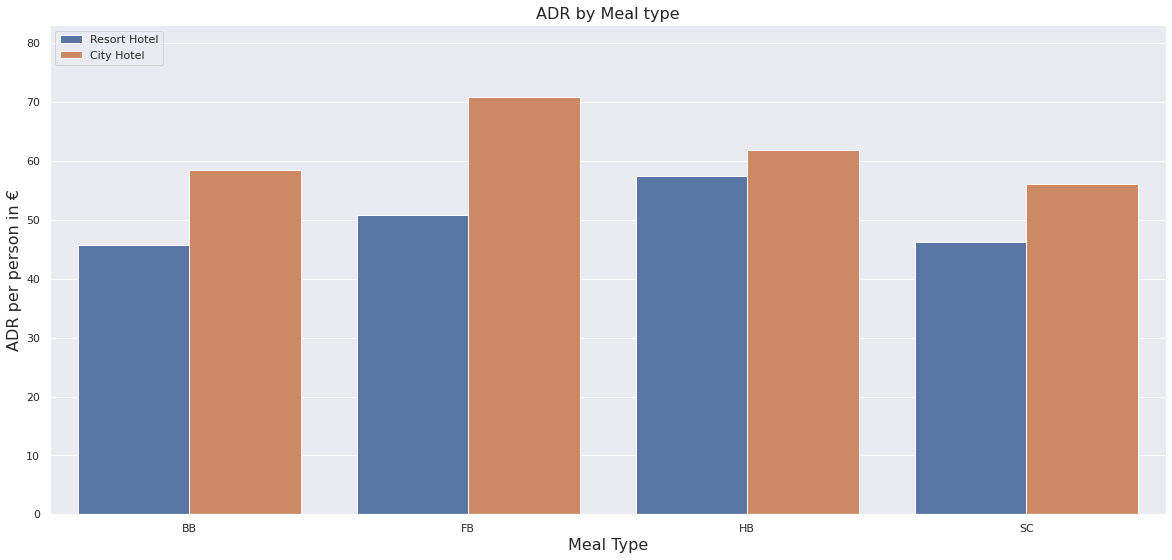

In [158]:
#  adr of different meal type
# show figure:
plt.figure(figsize=(20, 9))
sns.barplot(x="meal",
            y="adr_pp",
            hue="hotel",
            errwidth=0,
            data=df)
plt.title("ADR by Meal type", fontsize=16)
plt.xlabel("Meal Type", fontsize=16)
plt.ylabel("ADR per person in €", fontsize=16)
plt.legend(loc="upper left")
plt.show()

•	The HB meal type of CIty hotel has the highest least ADR per person  and FB type meal has the  highest least ADR per person for resort hotel and on the flip side least ADR per person Although most bookings are associated with BB meal type room

ADR for each deposit type across hotels

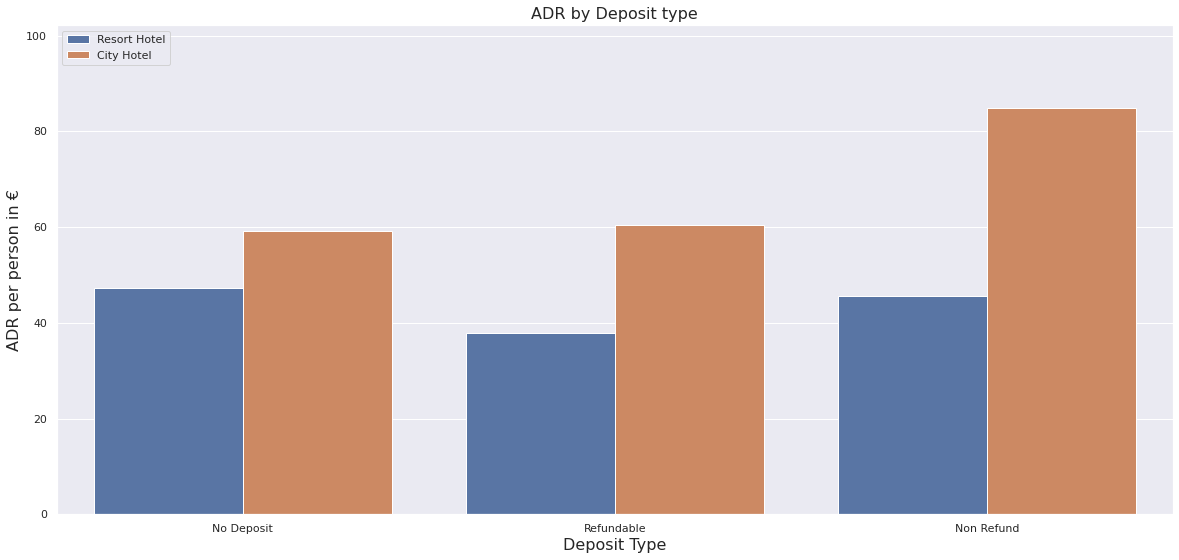

In [159]:
# adr for each deposit type where all are booked
adr_deposit =  df_book[['adr_pp','deposit_type','hotel']]
#  adr of different deposit type
# show figure:
plt.figure(figsize=(20, 9))
sns.barplot(x="deposit_type",
            y="adr_pp",
            hue="hotel",
            errwidth=0,
            data=adr_deposit)
plt.title("ADR by Deposit type", fontsize=16)
plt.xlabel("Deposit Type", fontsize=16)
plt.ylabel("ADR per person in €", fontsize=16)
plt.legend(loc="upper left")
plt.show()

*Inference* : Previouly we had observed that No deposit has highest amount of bookings but here we can although Non refundable was had the second most number of bookings assocaited to it but wrt to adr for Both City and Resort hotel it is high 

ADR based on Customer type 

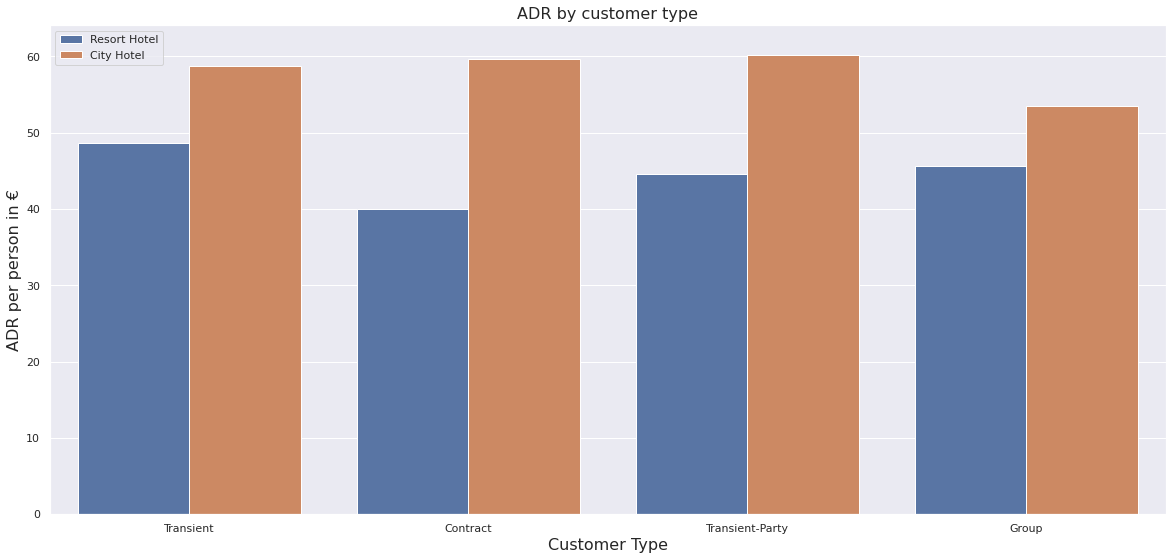

In [160]:
# adr for each customer type where all are booked
adr_customer =  df_book[['adr_pp','customer_type','hotel']]
#  adr of different customer type
# show figure:
plt.figure(figsize=(20, 9))
sns.barplot(x="customer_type",
            y="adr_pp",
            hue="hotel",
            errwidth=0,
            data=adr_customer)
plt.title("ADR by customer type", fontsize=16)
plt.xlabel("Customer Type", fontsize=16)
plt.ylabel("ADR per person in €", fontsize=16)
plt.legend(loc="upper left")
plt.show()

ADR of each customer type across various room types

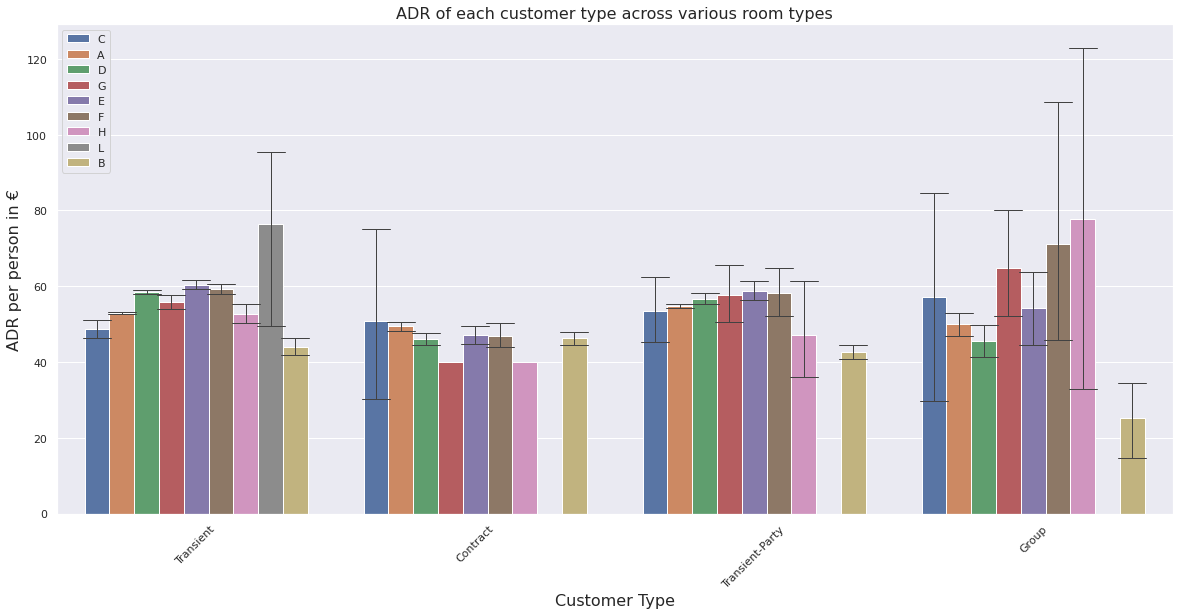

In [161]:
# price per night (ADR) and person based on booking and room. 
# show figure: #include SD
plt.figure(figsize=(20, 9))
sns.barplot(x="customer_type",
            y="adr_pp",
            hue="reserved_room_type",
            data=df_book,
            errwidth=1,
            capsize=0.1)
plt.title("ADR of each customer type across various room types", fontsize=16)
plt.xlabel("Customer Type", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("ADR per person in €", fontsize=16)
plt.legend(loc="upper left")
plt.show()

* we can see that for transient room type L
and for Group room type H are costlier 
* The ADR based on Customer Type across hotel types has remained more or less around the average 
even though, 
Transient - Customer Type and Transient-Party account for the most bookings and Group type account for the least 
* this must mean they(Transient) are being offered some kind of discount for such difference to be seen
* and group(customer type) have some rooms that are at a higher rate compared to the rest except for room type B - this could also mean that they are significant bookings(city hotels) for room type B for the total to be less than the other three groups but on the other hand for the total adr for resort hotel to be around the average must mean that travells in group are choosing costlier room types (willing to pay more).

In [162]:
#  a function that plots desired maps
def plotMapCustomerTypeBuckets(cust_typ1,cust_typ2):

  ''' creates maps for customer type associated categories and takes in only type names of this customer_type column
      ex - 'Transient', 'Contract', 'Transient-Party', 'Group'
  '''

  # plot the graph for group type travellers from various countries
  customer_type_bucket_df = pd.DataFrame(df.loc[(df['customer_type']==cust_typ1) | (df['customer_type']==cust_typ2)]['country'].value_counts())
  customer_type_bucket_df.rename(columns={'country':'Number of Travellers'},inplace=True)

  # help reduce noise as many countries had only one and 2 traveller(s) 
  # customer_type_bucket_df = customer_type_bucket_df[customer_type_bucket_df['Number of Travellers']>1] # simpler noice reduction
  customer_type_bucket_df = customer_type_bucket_df[customer_type_bucket_df['Number of Travellers'] >= round(customer_type_bucket_df.mean())[0]] # for even finer values 

  #  visulizing the same on a map
  r_min = round(customer_type_bucket_df.min()[0])
  r_max = round(customer_type_bucket_df.max()[0])  

  customer_type_bucket_travellers_map = px.choropleth(customer_type_bucket_df,
                                                      locations=customer_type_bucket_df.index,
                                                      color=customer_type_bucket_df["Number of Travellers"], 
                                                      hover_name=customer_type_bucket_df.index, 
                                                      color_continuous_scale="Viridis",
                                                      range_color=[r_min,r_max],
                                                      title=f"Home country of {cust_typ1} & {cust_typ2} Travellers")
  customer_type_bucket_travellers_map.show()
  print(f' the travellers of {cust_typ1} & {cust_typ2} group belong to countries {list(customer_type_bucket_df.index)} ')


[group and Contract] Map

In [163]:
# plot the graph for group type and Contract type travellers from various countries 
# creating the group and Contract type bucket

# bucket 1 [group and Contract]
plotMapCustomerTypeBuckets('Group','Contract')


 the travellers of Group & Contract group belong to countries ['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'IRL'] 


A simple Visualization that helps us see that these peole are willing to spend more and hence attracting this pirticular customer base would drastically increase the profits.

[Transient and Transient-Party] Map

In [164]:
# plot the graph for Transient type and Transient-Party type travellers from various countries 
# creating the Transient and Transient-Party type bucket

# bucket 2 [Transient and Transient-Party]
plotMapCustomerTypeBuckets('Transient','Transient-Party')

 the travellers of Transient & Transient-Party group belong to countries ['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'USA', 'NLD', 'CHE', 'CN', 'AUT', 'SWE', 'CHN', 'POL', 'ISR'] 


Travellers in this group were willing to travel more(more bookings) but were mostly intrested in a low-mid fare based hotel although there are some exceptions of high price hotel bookings also but theis category can be attracted using either combos or special discount deals.

Price per night and person for various Special Requests

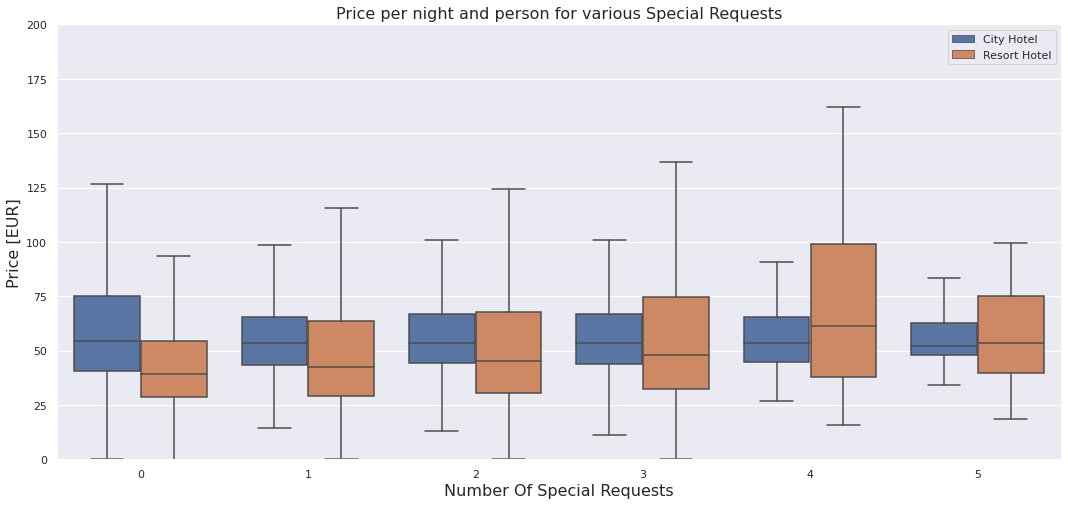

In [165]:
# plot adr versus the specail request across hotel types
plt.figure(figsize=(18, 8))
sns.boxplot(x="total_of_special_requests",
            y="adr_pp",
            hue="hotel",
            data=df_book, #only booked data
            hue_order=["City Hotel", "Resort Hotel"],
           fliersize=0)
plt.title("Price per night and person for various Special Requests", fontsize=16) # set title
plt.xlabel("Number Of Special Requests", fontsize=16) # x label
plt.ylabel("Price [EUR]", fontsize=16)                # y label
plt.legend(loc="upper right")                         # legend location
plt.ylim(0, 200)
plt.show()

No Relation of price of room with Special Requests

## Suggestions on Factors With potential to increase bookings and increase revenue




*	No-deposit type has the most cancellations to tackle this we must push customers to choose non-refundable/refundable type by providing complimentary items or offers on bookings.
*	Online TA (Travel Agents) contribute to the highest number of cancellations to tackle this we can offer discounts or cashbacks for traveller’s booking through an Online TA (Ex- booking.com)
*	Agent’s booking calculations account to 40,000(39%) of the total bookings we can reduce these numbers by offering various perks (ex: commission, providing bonus) to the agents.
*	Transient (customer type) has the most bookings as well as cancellations could be reduced by offering complimentary (meal, access to pool or gym)